<a href="https://colab.research.google.com/github/xyzabcdefghi/Pandas-1/blob/main/Pandas_combined_with_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2 major data structures used in pandas are: 1)Series; 2)DataFrame



Pandas series:
Think of a Series as a single column of data with labels (index).
It’s like a 1-D array but with labels for each value.

Note:

In Pandas, when you create a Series (or a DataFrame column) from a Python list, all values inside that column/Series must share a single data type internally.
If the list has mixed types, Pandas will automatically upcast or choose a common data type that can hold all values.

In [197]:
import pandas as pd

data = [10, 20, 30]
s = pd.Series(data)
print(s) # left side (0,1,2): index; right side: data

0    10
1    20
2    30
dtype: int64


In [198]:
# use own indexes
s = pd.Series([10,20,30], index=['a','b','c'])
print(s)

a    10
b    20
c    30
dtype: int64


In [199]:
# print(s[0])
# OR
print(s.iloc[0])

10


In [200]:
# print(s['a'])
# OR
print(s.loc['a'])

10


Pandas DataFrame:

A DataFrame is like a table (rows and columns).
It is made up of multiple Series put together as columns.

In [201]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}
df = pd.DataFrame(data)
print(df)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


In [202]:
df.columns # returns column names

Index(['Name', 'Age'], dtype='object')

In [203]:
# Give custom row labels using index parameter
df = pd.DataFrame(data, index=["row1", "row2", "row3"])
print(df)

         Name  Age
row1    Alice   25
row2      Bob   30
row3  Charlie   35


In [204]:
df['Name'] # access via columns. df['row1'] -> Error

,Name
row1,Alice
row2,Bob
row3,Charlie


In [205]:
# Create a Series from a scalar value

# scalar_series = pd.Series(5, index=[0, 1, 2, 3, 4])
# OR
scalar_series = pd.Series(5, range(5))
print(scalar_series)

0    5
1    5
2    5
3    5
4    5
dtype: int64


.loc[] (label-based index):
Use this when you want to access by custom label.

In [206]:
import pandas as pd
# Series with custom index
s = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print(s.loc['b'])   # Access using label

20


In [207]:
print(s.loc[['a','c']])
# s[['a','s']] # -> ERROR
# s['a','c'] # -> ERROR
# s['a'] # # -> np.int64(10)

a    10
c    30
dtype: int64


.iloc[] (integer position index):
Use this when you want to access by position (0,1,2…), like normal Python indexing.

In [208]:
print(s.iloc[1])    # 1 means second element

20


For DataFrame:


.loc[row_label, column_label]


.iloc[row_position, column_position]

In [209]:
data = {"Name": ["Alice","Bob"],
        "Age":[25,30]}
df = pd.DataFrame(data, index=["x","y"])
print(df)
print('*****************')

    Name  Age
x  Alice   25
y    Bob   30
*****************


In [210]:
# Using loc
print(df.loc["x","Name"])
print('*****************')

Alice
*****************


In [211]:
# Using iloc
print(df.iloc[1,0])
print('*****************')

Bob
*****************


In [212]:
# Using iloc
print(df.iloc[1]) # 1st row data

Name    Bob
Age      30
Name: y, dtype: object


In [213]:
s1 = pd.Series([11,22,33,44,55,66], index=['A','B','C','D','E','F'])
print("s1.iloc[-5] is", s1.iloc[-5])

s1.iloc[-5] is 22


.iloc[] uses positional indexing (ignores custom labels).
Negative positions work like Python lists:

-1 → last element

-2 → second last

-5 → fifth from last (i.e., first element in this case)

In [214]:
data = {
    "Name": ["Alice","Bob","Charlie","David","Eva"],
    "Age": [25,30,35,40,45]
}

df = pd.DataFrame(data, index=['A','B','C','D','E'])
print(df)
print('**********************')
print("df.iloc[-5] is:\n", df.iloc[-5])


      Name  Age
A    Alice   25
B      Bob   30
C  Charlie   35
D    David   40
E      Eva   45
**********************
df.iloc[-5] is:
 Name    Alice
Age        25
Name: A, dtype: object


Boolean Indexing in Pandas

Boolean indexing means filtering data based on a condition.

Instead of manually looping, you pass a condition and Pandas gives only the rows/values that satisfy it.

In [215]:
ageSeries = pd.Series([25, 30, 35, 40, 45,50])

In [216]:
ageSeries > 30     #This returns a boolean Series:

,0
0,False
1,False
2,True
3,True
4,True
5,True


In [217]:
#Apply condition to filter (Note: Filtering returns the same type Series).
older_than_30 = ageSeries[ageSeries > 30]
older_than_30

,0
2,35
3,40
4,45
5,50


Boolean indexing works for both Series and DataFrame.

You can combine conditions using &, |, ~ (and, or, not).

In [218]:
print(ageSeries[(ageSeries > 30) & (ageSeries < 45)])

2    35
3    40
dtype: int64


In [219]:
greater_than_30_and_not_45 = ageSeries[(ageSeries > 30) & ~(ageSeries == 45)]
print(greater_than_30_and_not_45)

2    35
3    40
5    50
dtype: int64


In [220]:
# Create a DataFrame
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva","Farish"],
    "Age": [25, 30, 35, 40, 45,50],
    "City": ["Delhi", "Mumbai", "Bangalore", "Chennai", "Pune","Udupi"]
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df, "\n")

# Filter rows: Age > 30 and Age != 45
filtered_df = df[(df["Age"] > 30) & (~(df["Age"] == 45))]

print("People older than 30 but not 45:\n", filtered_df)


Original DataFrame:
       Name  Age       City
0    Alice   25      Delhi
1      Bob   30     Mumbai
2  Charlie   35  Bangalore
3    David   40    Chennai
4      Eva   45       Pune
5   Farish   50      Udupi 

People older than 30 but not 45:
       Name  Age       City
2  Charlie   35  Bangalore
3    David   40    Chennai
5   Farish   50      Udupi


In [221]:
nums = pd.Series([2,4,6,7])
nums/2

,0
0,1.0
1,2.0
2,3.0
3,3.5


In [222]:
import numpy as np
np.log(nums)

,0
0,0.693147
1,1.386294
2,1.791759
3,1.945910


The unique() function in Pandas is used to get all distinct values from a Series (duplicates removed).



In [223]:
ageSeries = pd.Series([25, 30, 35, 30, 40, 25, 45])

print("Original Series:")
print(ageSeries)

Original Series:
0    25
1    30
2    35
3    30
4    40
5    25
6    45
dtype: int64


In [224]:
# Get unique values
print("\nUnique values:")
print(ageSeries.unique())
print(type(ageSeries.unique())) # The output of Series.unique() is a NumPy array (no index, just values).


Unique values:
[25 30 35 40 45]
<class 'numpy.ndarray'>


value_counts() is like an enhanced version of unique():

- It shows all unique values

- AND counts how many times each value appears

- Returns a Pandas Series (not a numpy array)

In [225]:
# value_counts( ): This function not only returns the unique values but calculates occurrences within a Series.
ageSeries = pd.Series([25, 30, 35, 30, 40, 25, 45,30])

print("Unique values with their counts:")
print(ageSeries.value_counts())
print('****************************')
print(ageSeries.value_counts().loc[30])

Unique values with their counts:
30    3
25    2
35    1
40    1
45    1
Name: count, dtype: int64
****************************
3


In [226]:
letters = pd.Series(['A','C','D','A','B','D','E','B','A'])
print(letters.unique())
print('******************')
print(letters.value_counts())
print('******************')
print(letters.value_counts().loc['A'])

['A' 'C' 'D' 'B' 'E']
******************
A    3
D    2
B    2
C    1
E    1
Name: count, dtype: int64
******************
3


The isin() function in Pandas checks if each element in a Series (or DataFrame column) belongs to a list of values you give.
It returns True or False for each element (a boolean Series or DataFrame).

In [227]:
ageSeries = pd.Series([25, 30, 35, 40, 45])

# Check if values are in [30, 40]
mask = ageSeries.isin([30, 40])
print(mask)

0    False
1     True
2    False
3     True
4    False
dtype: bool


In [228]:
# Using it to filter values
filtered = ageSeries[ageSeries.isin([30, 40])]
print(filtered)
print('***************')
filtered = ageSeries[~ageSeries.isin([30, 40])]
print(filtered)

1    30
3    40
dtype: int64
***************
0    25
2    35
4    45
dtype: int64


In [229]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40]
}
df = pd.DataFrame(data)

# Filter rows where Age is 30 or 40
result = df[df["Age"].isin([30, 40])]
print(result)

    Name  Age
1    Bob   30
3  David   40


.empty():

In [230]:
ageSeries = pd.Series([25, 30, 35, 40, 45])

values_to_check = [100, 200]  # not present
filtered = ageSeries[ageSeries.isin(values_to_check)]

if filtered.empty: # .empty() to check for empty series
    print("***No matching values***")
else:
    print(filtered)

***No matching values***


In [231]:
data = {"Name": ["Alice","Bob"], "Age":[25,30]}
df = pd.DataFrame(data)

result = df[df["Age"].isin([99])]

if result.empty:
    print("***No matching values***")
else:
    print(result)

***No matching values***


.any()

How it works:
ageSeries.isin(values_to_check) → gives a boolean Series

.any() → True if at least one True is present

In [232]:
ageSeries = pd.Series([25, 30, 35, 40, 45,100])

values_to_check = [100, 200]
bool_series = ageSeries.isin(values_to_check)
print(bool_series)
print('******************')

if bool_series.any():
    print("Matching values found")
    print('matching vals:\n', ageSeries[bool_series])
else:
    print("No matching values")

print('**********************')
bool_series_2  = ageSeries.isin([33, 200]) # not present
print(bool_series_2)

if bool_series_2.any():
    print("Matching values found")
else:
    print("No matching values")

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool
******************
Matching values found
matching vals:
 5    100
dtype: int64
**********************
0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool
No matching values


.get(value, default)

default: can be anything (string, list, number etc)

In [233]:
# As seen before, To get the frequency of a value in a Pandas Series, you can use:
s = pd.Series([10, 20, 40,20])
s.value_counts()[20]
# But this will throw an error if the value u r looking for is not present
# s.value_counts()[30] # -> ERROR as 30 is not in the series.
# SOLUTION: use .get(val, default)

np.int64(2)

In [234]:
s.value_counts().get(20, 0)
# print the frequency of 30 if present else print 0

np.int64(2)

In [235]:
s.value_counts().get(30, 0)
# print the frequency of 30 if present else print 0

0

In [236]:
s.value_counts().get(30, "NUMBER NOT FOUND :(")
# print the frequency of 30 if present else print "NUMBER NOT FOUND :("

'NUMBER NOT FOUND :('

Missing values in Pandas:

np.nan (or None) is used to represent missing values.

When Pandas sees NaN or None in numeric data, it automatically converts the entire column/Series to float, because NaN is a float. (Read "Note" in 1st text)

In [237]:
import numpy as np

data = [1, 2, np.nan, 4, 5, None]
series = pd.Series(data)
print(series)
# Notice how 1,2,4,5 became floats -> dtype: float64

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
5    NaN
dtype: float64


Detecting Missing Values:

isnull() or isna() → True where value is missing

notnull() or notna() → True where value is present

In [238]:
data = [1, 2, np.nan, 4, 5, None]
series = pd.Series(data)

print(series.isnull())
print('***************')
print(series.notnull())

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool
***************
0     True
1     True
2    False
3     True
4     True
5    False
dtype: bool


Filling missing values:

In [239]:
filled_series = series.fillna(0)
print(filled_series)
# filled_series = series.fillna(series.mean()) # Replace missing vals with mean (mean of existing vals)

0    1.0
1    2.0
2    0.0
3    4.0
4    5.0
5    0.0
dtype: float64


Dropping missing values:

In [240]:
clean_series = series.dropna()
print(clean_series)

0    1.0
1    2.0
3    4.0
4    5.0
dtype: float64


Let’s take an example with a DataFrame containing NaN values and see how isna(), fillna(), and dropna() work.

In [241]:
data = {
    "Name": ["Alice", "Bob", np.nan, "David"],
    "Age": [25, np.nan, 35, 40],
    "City": ["Delhi", "Mumbai", "Bangalore", None]
}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)


Original DataFrame:
     Name   Age       City
0  Alice  25.0      Delhi
1    Bob   NaN     Mumbai
2    NaN  35.0  Bangalore
3  David  40.0       None


In [242]:
print("\nCheck for missing values:\n", df.isna())


Check for missing values:
     Name    Age   City
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True


In [243]:
filled_df = df.fillna("Unknown")
print("\nAfter fillna():\n", filled_df)


After fillna():
       Name      Age       City
0    Alice     25.0      Delhi
1      Bob  Unknown     Mumbai
2  Unknown     35.0  Bangalore
3    David     40.0    Unknown


In [244]:
# for age usually replace with 0 and not 'unknown'; But this will return new series.
df["Age"].fillna(0)

,Age
0,25.0
1,0.0
2,35.0
3,40.0


In [245]:
# To replace in original df:
df['Age'] = df["Age"].fillna(0)
print(df)
print('*******************************')
# OR
# df['Age'].fillna(0, inplace=True)
# Pandas gives a warning sometimes (SettingWithCopyWarning) because you are modifying a view (a slice) of the DataFrame,
# not always the original object. This can cause unexpected bugs.
# So use:
df.fillna({'Age': 0}, inplace=True)
print(df)
# Multiple columns at once:
# df.fillna({'Age': 99999999,'City':'XXXXXXXXXXXXX'}, inplace=True)

    Name   Age       City
0  Alice  25.0      Delhi
1    Bob   0.0     Mumbai
2    NaN  35.0  Bangalore
3  David  40.0       None
*******************************
    Name   Age       City
0  Alice  25.0      Delhi
1    Bob   0.0     Mumbai
2    NaN  35.0  Bangalore
3  David  40.0       None


In [246]:
clean_df = df.dropna()
print("\nAfter dropna():\n", clean_df)


After dropna():
     Name   Age    City
0  Alice  25.0   Delhi
1    Bob   0.0  Mumbai


In [247]:
# Drop Entire rows only if None/nan is there in "Name" column
df = df.dropna(subset=['Name'])
df

,Name,Age,City
0,Alice,25.0,Delhi
1,Bob,0.0,Mumbai
3,David,40.0,None


In [248]:
# You can drop rows only if all columns are NaN by using:
data = {
    "Name": ["Alice", None, None],
    "Age": [25, None, None],
    "City": ["Delhi", None, None]
}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df, "\n")

# Drop rows where all columns are NaN
df_clean = df.dropna(how='all')
print("After dropna(how='all'):\n", df_clean)

Original DataFrame:
     Name   Age   City
0  Alice  25.0  Delhi
1   None   NaN   None
2   None   NaN   None 

After dropna(how='all'):
     Name   Age   City
0  Alice  25.0  Delhi


Creating a Series from a dictionary:

- Keys → become index

- Values → become data

In [249]:
data_dict = {'a': 1, 'b': 2, 'c': 3, 'd':4}
series = pd.Series(data_dict)
series

,0
a,1
b,2
c,3
d,4


Attributes:

series.values → The data values (as a numpy array)

series.index → The index/labels

In [250]:
series.values # numpy array

array([1, 2, 3, 4])

In [251]:
series.index # numpy array

Index(['a', 'b', 'c', 'd'], dtype='object')

In [252]:
# Accessing values by label/index:
print(series['a'])  # Output: 1

1


In [253]:
# Accessing values by position:
print(series[0:2]) # 2nd index is excluded

a    1
b    2
dtype: int64


In [254]:
mydict = {'red': 3000, 'green': 2000, 'blue': 1000}
myseries1 = pd.Series(mydict)
print(myseries1)

red      3000
green    2000
blue     1000
dtype: int64


In [255]:
colors = ['red','green','white','yellow','orange']
series = pd.Series(mydict, index=colors)
series

,0
red,3000.0
green,2000.0
white,NaN
yellow,NaN
orange,NaN


Element-wise operations between two Pandas Series:

Key concept: Alignment by Index

When performing arithmetic between two Series:

Pandas matches values by their index labels.

If an index exists in one Series but not the other → result is NaN for that index.

In [256]:
s1 = pd.Series([1, 2, 3, 4, 5, 6])
s2 = pd.Series([10, 20, 30, 40, 50])

add = s1 + s2
print(add)
print('*****************')
sub = s1 - s2
print(sub)
print('*****************')
mul = s1 * s2
print(mul)
print('*****************')
div = s2 / s1
print(div)

0    11.0
1    22.0
2    33.0
3    44.0
4    55.0
5     NaN
dtype: float64
*****************
0    -9.0
1   -18.0
2   -27.0
3   -36.0
4   -45.0
5     NaN
dtype: float64
*****************
0     10.0
1     40.0
2     90.0
3    160.0
4    250.0
5      NaN
dtype: float64
*****************
0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
5     NaN
dtype: float64


In [257]:
# Create two Series with custom indexes
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s2 = pd.Series([10, 20, 30], index=['b', 'c', 'd'])

print("s1:\n", s1, "\n")
print("s2:\n", s2, "\n")

# Perform addition
add = s1 + s2
print("Addition (alignment by index):\n", add)


s1:
 a    1
b    2
c    3
dtype: int64 

s2:
 b    10
c    20
d    30
dtype: int64 

Addition (alignment by index):
 a     NaN
b    12.0
c    23.0
d     NaN
dtype: float64


If you want to ignore indexes and just use position:
You can convert Series to numpy arrays:

In [258]:
(s1.values + s2.values)

array([11, 22, 33])

What is broadcasting?

When you perform arithmetic between a Series (or DataFrame) and a single value (scalar),
Pandas applies the operation to every element automatically.
This is called broadcasting.

In [259]:
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
print("Original Series:\n", s1)

scalar_prod = s1 * 2
print("\nScalar Multiplication s1 * 2:\n", scalar_prod)

Original Series:
 a    1
b    2
c    3
dtype: int64

Scalar Multiplication s1 * 2:
 a    2
b    4
c    6
dtype: int64


In [260]:
import pandas as pd

data = {
    "Math": [80, 90, 85],
    "Science": [70, 88, 92],
    "Text": ['A','B','C']
}
df = pd.DataFrame(data, index=["Alice", "Bob", "Charlie"])

print("Original DataFrame:\n", df)

# Multiply entire DataFrame by 2
scaled_df = df * 2
print("\nAfter broadcasting (df * 2):\n", scaled_df)

Original DataFrame:
          Math  Science Text
Alice      80       70    A
Bob        90       88    B
Charlie    85       92    C

After broadcasting (df * 2):
          Math  Science Text
Alice     160      140   AA
Bob       180      176   BB
Charlie   170      184   CC


If you want to multiply only numeric columns:

select_dtypes(include='number') → numeric columns


select_dtypes(exclude='number') → non-numeric columns




In [261]:
data = {
    "Math": [80, 90, 85],
    "Science": [70, 88, 92],
    "Text": ['A','B','C']
}
df = pd.DataFrame(data, index=["Alice", "Bob", "Charlie"])

df_num = df.select_dtypes(include=['number'])
scaled_df = df_num * 2
print(scaled_df)

         Math  Science
Alice     160      140
Bob       180      176
Charlie   170      184


Or do it in-place for numeric columns only:

In [262]:
data = {
    "Math": [80, 90, 85],
    "Science": [70, 88, 92],
    "Text": ['A','B','C']
}
df = pd.DataFrame(data, index=["Alice", "Bob", "Charlie"])

df[df.select_dtypes(include='number').columns] *= 2
df

,Math,Science,Text
Alice,160,140,A
Bob,180,176,B
Charlie,170,184,C


Only 'Math' column by *2:

In [263]:
data = {
    "Math": [80, 90, 85],
    "Science": [70, 88, 92],
    "Text": ['A','B','C']
}
df = pd.DataFrame(data, index=["Alice", "Bob", "Charlie"])

df["Math"] *= 2
df

,Math,Science,Text
Alice,160,70,A
Bob,180,88,B
Charlie,170,92,C


data = [x1, x2, x3, x4, x5 ...]

Mean:
- x'= ∑xi / n
- afftected by outlier (1 high/ low value can mislead)

Median:
- If n is odd: middle value at position: (n+1)/2
- If n is even: average of values at positions: n/2 and (n/2)+1
- Not afftected by outlier
Mode:
Most frequent value.

Variance:
- Measures how spread out values are from the mean.
- $σ^2$= ∑(x-x')/N
- N if entire population;
- (N-1) if sample population. This is called Bessel’s correction.
It compensates for the bias caused by using a sample instead of the entire population.

Std Deviation:
- σ = $\sqrt{varience}$
- Average distance of values from mean; same units as data.

Range:
- max(x)−min(x)
- Quick spread between largest and smallest.

Coefficient of Varience (CV):
- CV = (σ/x')* 100%
- CV < 20% → Low spread (values close to mean)

- 20%–50% → Moderate spread

- 50% → High spread (values very scattered)



In [264]:
s1 = pd.Series([10, 20, 30, 40, 50])

print("Sum:", s1.sum())                 # 150
print("Mean:", s1.mean())               # 30.0
print("Median:", s1.median())           # 30.0
print("Standard Deviation:", s1.std())  # 15.811...
print("Variance:", s1.var())            # 250.0
print("Min:", s1.min())                 # 10
print("Max:", s1.max())                 # 50
print("Index of max:", s1.idxmax())     # 4
print("Quantile 0.25:", s1.quantile(0.25))  # 20
print("\nDescribe():\n", s1.describe())

Sum: 150
Mean: 30.0
Median: 30.0
Standard Deviation: 15.811388300841896
Variance: 250.0
Min: 10
Max: 50
Index of max: 4
Quantile 0.25: 20.0

Describe():
 count     5.000000
mean     30.000000
std      15.811388
min      10.000000
25%      20.000000
50%      30.000000
75%      40.000000
max      50.000000
dtype: float64


In [265]:
# Other operations
s1 = pd.Series([1, 2, 3, 4, 5, 6])
s2 = pd.Series([10, 20, 30, 40, 50, 1])

# concatenate:
concatenated = pd.concat([s1, s2])
print("Concatenated Series:\n", concatenated, "\n")
print('*********************************')

# Using iloc (position-based):
print("concatenated.iloc[0] ->", concatenated.iloc[0])   # 1 (1st row)
print("concatenated.iloc[6] ->", concatenated.iloc[6])   # 10 (7th row)
print('*********************************')

# Using loc (label-based):
print("\nconcatenated.loc[0] ->")
print(concatenated.loc[0])   # returns all rows with index label 0
print('*********************************')

Concatenated Series:
 0     1
1     2
2     3
3     4
4     5
5     6
0    10
1    20
2    30
3    40
4    50
5     1
dtype: int64 

*********************************
concatenated.iloc[0] -> 1
concatenated.iloc[6] -> 10
*********************************

concatenated.loc[0] ->
0     1
0    10
dtype: int64
*********************************


Custom function with apply()

In [266]:
def custom_op(val):
    return (val * 2) + 3

s1 = pd.Series([4, 1, 2, 3])

custom_series = s1.apply(custom_op)
custom_series

,0
0,11
1,5
2,7
3,9


In [267]:
df = pd.DataFrame({
    "Math": [10,20,30],
    "Science": [40,50,60]
}, index=["Alice", "Bob", "Charlie"])

print("Original DataFrame:\n", df)
print('*****************************')

Original DataFrame:
          Math  Science
Alice      10       40
Bob        20       50
Charlie    30       60
*****************************


In [268]:
# Custom function
def custom_op(val):
    return val+1

# Apply column-wise (default axis=0)
print("\nApply column-wise (each value):")
print(df.apply(custom_op))
print('*****************************')


Apply column-wise (each value):
         Math  Science
Alice      11       41
Bob        21       51
Charlie    31       61
*****************************


In [269]:
# Apply to few particular column:
print(df["Math"].apply(custom_op)) # returns new series
print('*****************************')

# inplace:
df["Math"] = df["Math"].apply(custom_op)
df

Alice      11
Bob        21
Charlie    31
Name: Math, dtype: int64
*****************************


,Math,Science
Alice,11,40
Bob,21,50
Charlie,31,60


In [270]:
# If there is text column:
df = pd.DataFrame({
    "Math": [10,20,30],
    "Science": [40,50,60],
    "Text":['A','B','C']
}, index=["Alice", "Bob", "Charlie"])

print("Original DataFrame:\n", df)
print('*****************************')


Original DataFrame:
          Math  Science Text
Alice      10       40    A
Bob        20       50    B
Charlie    30       60    C
*****************************


In [271]:
def custom_op_new(value):
    return value*2

# df[['Math','Science']].apply(custom_op_new)
# print(df) # Won't see any changes-> apply() does not modify in place; it creates a new object.You must explicitly assign it bck to those columns.

# df[['Math','Science']]= df[['Math','Science']].apply(custom_op_new)
# df

# OR

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].apply(custom_op_new)
df

,Math,Science,Text
Alice,20,80,A
Bob,40,100,B
Charlie,60,120,C


s1 > 2 performs an element-wise comparison:

- 4 > 2 → True

- 1 > 2 → False

- 2 > 2 → False

- 3 > 2 → True

The result is a Boolean Series of the same size.

In [272]:
s1 = pd.Series([1,2,3,4])
greater_than_two = s1 > 2
print("Greater than 2:\n", greater_than_two)

Greater than 2:
 0    False
1    False
2     True
3     True
dtype: bool


In [273]:
# to filter:
filtered = s1[s1 > 2]
print(filtered)

2    3
3    4
dtype: int64


In [274]:
#  Creating DataFrame From a Dictionary of Lists
data = {'color' :  ['blue','green','yellow','red','white'],
        'object' : ['ball','pen','pencil','paper','paper'],
        'price' :  [1.2,    1.0,    0.6,    0.9,   1.7]
       }

frame1 = pd.DataFrame(data)
print(frame1)

    color  object  price
0    blue    ball    1.2
1   green     pen    1.0
2  yellow  pencil    0.6
3     red   paper    0.9
4   white   paper    1.7


In [275]:
# custom index:
frame2 = pd.DataFrame(data, index=['zero','one','two','three','four'])
frame2

,color,object,price
zero,blue,ball,1.2
one,green,pen,1.0
two,yellow,pencil,0.6
three,red,paper,0.9
four,white,paper,1.7


In [276]:
# Attributes:
print(frame2.index)      # Index labels
print('**************************')

print(frame2.columns)     # Column names
print('**************************')

print(frame2.values)     # Numpy 2D array of data

Index(['zero', 'one', 'two', 'three', 'four'], dtype='object')
**************************
Index(['color', 'object', 'price'], dtype='object')
**************************
[['blue' 'ball' 1.2]
 ['green' 'pen' 1.0]
 ['yellow' 'pencil' 0.6]
 ['red' 'paper' 0.9]
 ['white' 'paper' 1.7]]


In [277]:
frame2.iloc[2]

,two
color,yellow
object,pencil
price,0.6


In [278]:
frame2.loc['one']

,one
color,green
object,pen
price,1.0


In [279]:
# Conditional selection
frame2['object'] == 'paper'

,object
zero,False
one,False
two,False
three,True
four,True


In [280]:
frame2[frame2['object'] == 'paper']

,color,object,price
three,red,paper,0.9
four,white,paper,1.7


In [281]:
# Accessing a single cell .... Two ways:
frame2.at['three', 'object']
# OR
# frame2['object']['three']

'paper'

In [282]:
# Row slicing
frame2[1:3]   # 3 is excluded

,color,object,price
one,green,pen,1.0
two,yellow,pencil,0.6


In [283]:
frame2.index.name = 'ID'
frame2.columns.name = 'ITEM'
frame2

# index.name = 'id' → Labels the index column as id.
# columns.name = 'item' → Labels the header row as item.
# This is only for display/metadata (doesn’t affect how you access rows/columns).

ITEM,color,object,price
ID,,,
zero,blue,ball,1.2
one,green,pen,1.0
two,yellow,pencil,0.6
three,red,paper,0.9
four,white,paper,1.7


Add new column:

Adding a new column is as simple as df['new_col'] = values.

where values can be a:

- A scalar (applies to all rows)

- A list/array (must match number of rows)

- A Series (matches by index labels)

In [284]:
# From scalar
frame2['discount'] = 0.1 # Say, all items have 10% discount
print(frame2)

ITEM    color  object  price  discount
ID                                    
zero     blue    ball    1.2       0.1
one     green     pen    1.0       0.1
two    yellow  pencil    0.6       0.1
three     red   paper    0.9       0.1
four    white   paper    1.7       0.1


In [285]:
# From Series
frame2['quantity'] = pd.Series([11, 12, 13, 14, 15])
frame2
# quantity will be filled with NaN cuz index do not match (by default: 0,1,2...)

ITEM,color,object,price,discount,quantity
ID,,,,,
zero,blue,ball,1.2,0.1,NaN
one,green,pen,1.0,0.1,NaN
two,yellow,pencil,0.6,0.1,NaN
three,red,paper,0.9,0.1,NaN
four,white,paper,1.7,0.1,NaN


In [286]:
frame2['quantity'] = pd.Series([11, 12, 13, 14, 15], index= ['zero','one','two','three','four'])
frame2

ITEM,color,object,price,discount,quantity
ID,,,,,
zero,blue,ball,1.2,0.1,11
one,green,pen,1.0,0.1,12
two,yellow,pencil,0.6,0.1,13
three,red,paper,0.9,0.1,14
four,white,paper,1.7,0.1,15


In [287]:
frame2['quantity'] = pd.Series([11, 12, 13, 14, 15,16], index= ['zero','one','two','three','four','five'])
frame2
# NOTE: extra will be ignored (16, 'five')

ITEM,color,object,price,discount,quantity
ID,,,,,
zero,blue,ball,1.2,0.1,11
one,green,pen,1.0,0.1,12
two,yellow,pencil,0.6,0.1,13
three,red,paper,0.9,0.1,14
four,white,paper,1.7,0.1,15


In [288]:
# From list (modifying quantity column for demo)
frame2['quantity'] = [10, 11, 12, 12, 14]
frame2

ITEM,color,object,price,discount,quantity
ID,,,,,
zero,blue,ball,1.2,0.1,10
one,green,pen,1.0,0.1,11
two,yellow,pencil,0.6,0.1,12
three,red,paper,0.9,0.1,12
four,white,paper,1.7,0.1,14


In [289]:
# Add a new column 'total' as price * quantity
frame2['total'] = frame2['price'] * frame2['quantity']

print("DataFrame after adding 'total' column:\n")
print(frame2)

DataFrame after adding 'total' column:

ITEM    color  object  price  discount  quantity  total
ID                                                     
zero     blue    ball    1.2       0.1        10   12.0
one     green     pen    1.0       0.1        11   11.0
two    yellow  pencil    0.6       0.1        12    7.2
three     red   paper    0.9       0.1        12   10.8
four    white   paper    1.7       0.1        14   23.8


In [290]:
frame2.isin([0.6, 'pen', 1.0,23.8]) # whichever frame[row][column] is in [0.6, 'pen', 1.0,23.8] -> True ... rest False

ITEM,color,object,price,discount,quantity,total
ID,,,,,,
zero,False,False,False,False,False,False
one,False,True,True,False,False,False
two,False,False,True,False,False,False
three,False,False,False,False,False,False
four,False,False,False,False,False,True


In [291]:
frame2.isin([0.6, 'pen', 1.0,23.8]).any() # Column: Boolean ; col with atleast one true

,0
ITEM,
color,False
object,True
price,True
discount,False
quantity,False
total,True


In [292]:
# Finds rows where at least one column matches.
frame2.isin([0.6, 'pen', 1.0,23.8]).any(axis=1) # rows with atleast one True -> True ... rest False

,0
ID,
zero,False
one,True
two,True
three,False
four,True


In [293]:
# use it to filter:
filtered = frame2[frame2.isin([0.6, 'pen', 1.0,23.8]).any(axis=1)]
filtered

ITEM,color,object,price,discount,quantity,total
ID,,,,,,
one,green,pen,1.0,0.1,11,11.0
two,yellow,pencil,0.6,0.1,12,7.2
four,white,paper,1.7,0.1,14,23.8


Understanding axis = 1

In [294]:
data = {
    "name": ["Amit", "Bala", "Charan", "Deepa"],
    "city": ["Delhi", "Mumbai", "Pune", "Delhi"],
    "age": [25, 30, 22, 28]
}
df = pd.DataFrame(data)
print(df)

     name    city  age
0    Amit   Delhi   25
1    Bala  Mumbai   30
2  Charan    Pune   22
3   Deepa   Delhi   28


In [295]:
df.isin(['Pune','Delhi'])

,name,city,age
0,False,True,False
1,False,False,False
2,False,True,False
3,False,True,False


In [296]:
print(df[df.isin(['Pune', 'Delhi'])]) # Replaces False with NaN ... Doesn't remove the rows

  name   city  age
0  NaN  Delhi  NaN
1  NaN    NaN  NaN
2  NaN   Pune  NaN
3  NaN  Delhi  NaN


In [297]:
print(df[df.isin(['Pune', 'Delhi']).any(axis = 1)]) # Remove rows with all Nan values

     name   city  age
0    Amit  Delhi   25
2  Charan   Pune   22
3   Deepa  Delhi   28


In [298]:
# Deleting a column
del df['age'] # Deletes a column permanently | Does not return the deleted data | Modifies the DataFrame in place.
df

# OR

# df.drop(columns=['age'], inplace=True) # Does not change the DataFrame unless inplace=True | By default, returns a new DataFrame with the column removed.
# df

# OR

# df.pop('age') # Deletes a column permanently | Returns the deleted column as a Series | modifies the DataFrame in place.
# df

,name,city
0,Amit,Delhi
1,Bala,Mumbai
2,Charan,Pune
3,Deepa,Delhi


In [299]:
frame=pd.DataFrame(np.arange(16).reshape(4,4), columns=['c0','c1','c2','c3'])
# frame['Text'] = ['a','b','c','d']
print(frame)
print('*************************')
mask= frame[frame < 13]
print(mask)
print('*************************')
print(mask.dropna())

   c0  c1  c2  c3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
*************************
   c0   c1    c2    c3
0   0  1.0   2.0   3.0
1   4  5.0   6.0   7.0
2   8  9.0  10.0  11.0
3  12  NaN   NaN   NaN
*************************
   c0   c1    c2    c3
0   0  1.0   2.0   3.0
1   4  5.0   6.0   7.0
2   8  9.0  10.0  11.0


In [300]:
# Inplace:
frame = pd.DataFrame(np.arange(16).reshape(4, 4),
                     columns=['c0','c1','c2','c3'])

print("Original DataFrame:\n", frame, "\n")
print('***************************************')
# Create a mask for rows to keep (all values <= 13)
mask = (frame <= 13).all(axis=1)
print(mask)
print('***************************************')

# Drop rows where any value > 13 (in place)
frame.drop(index=frame[~mask].index, inplace=True)

print("After deleting rows with any value > 12:\n", frame)


Original DataFrame:
    c0  c1  c2  c3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15 

***************************************
0     True
1     True
2     True
3    False
dtype: bool
***************************************
After deleting rows with any value > 12:
    c0  c1  c2  c3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11


In [301]:
# delete rows where the value in column c2 is greater or equal to 10:
frame = pd.DataFrame(np.arange(16).reshape(4, 4),
                     columns=['c0','c1','c2','c3'])

print("Original DataFrame:\n", frame, "\n")
print('***************************************')

frame['c2'] >= 10

Original DataFrame:
    c0  c1  c2  c3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15 

***************************************


,c2
0,False
1,False
2,True
3,True


In [302]:
frame = pd.DataFrame(np.arange(16).reshape(4, 4),
                     columns=['c0','c1','c2','c3'])
print("Original DataFrame:\n", frame, "\n")

# to delete rows where the value in column c2 is greater than 10
frame = frame[frame['c2'] < 10]
frame

Original DataFrame:
    c0  c1  c2  c3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15 



,c0,c1,c2,c3
0,0,1,2,3
1,4,5,6,7


In [303]:
# To delete rows that have any value greater than 6 (in any column), use this:
frame = frame[(frame <= 6).all(axis=1)]
frame

,c0,c1,c2,c3
0,0,1,2,3


In [304]:
# Dictionary data
data = {
    'Name': ['Amit', 'Bala', 'Charan'],
    'Age': [25, 30, 22],
    'City': ['Delhi', 'Mumbai', 'Pune']
}

# Create DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:\n", df, "\n")

# Transpose the DataFrame
df.T

Original DataFrame:
      Name  Age    City
0    Amit   25   Delhi
1    Bala   30  Mumbai
2  Charan   22    Pune 



,0,1,2
Name,Amit,Bala,Charan
Age,25,30,22
City,Delhi,Mumbai,Pune


# Index Objects in Pandas

What is an Index?
In Pandas, Index represents the labels for rows (and for columns in a DataFrame).

Immutable:

You cannot directly change individual labels in an Index (e.g., ser.index[0] = "abc" will throw an error).

Why immutable?

This makes them safe to share across multiple objects without accidental modifications.



In [305]:
ser = pd.Series([5,1,3,8,4,1], index=['red','blue','yellow','white','green','orange'])
print("Series:\n", ser)
print("\nIndex object:", ser.index)

Series:
 red       5
blue      1
yellow    3
white     8
green     4
orange    1
dtype: int64

Index object: Index(['red', 'blue', 'yellow', 'white', 'green', 'orange'], dtype='object')


idxmin()

Purpose: Returns the label (index) of the first occurrence of the minimum value.

Works on both Series and DataFrames.

In [306]:
print("Index of minimum value:", ser.idxmin()) # label of min value ie blue (orange also has 1; but not 1st occurance)
print("Index of maximum value:", ser.idxmax()) # label of max value ie white

Index of minimum value: blue
Index of maximum value: white


In [307]:
ser.index[1]
# Note: ser.index[0] = 'pink' # -> ERROR cuz immutable

'blue'

In [308]:
# ser.index[0] = 'pink'
# -> ERROR cuz immutable

# If you want to change, you have to replace the whole index:

ser.index = ['new1','new2','new3','new4','new5','new6']
print(ser.index)
print('*************')
ser.index[1]

Index(['new1', 'new2', 'new3', 'new4', 'new5', 'new6'], dtype='object')
*************


'new2'

Index with duplicate labels

In pandas, index labels can be duplicated.

This means you can have multiple rows (or Series elements) with the same index label.

In [309]:
s = pd.Series(range(7), index=['white','white','blue','green','green','yellow','white'])
print(s)

white     0
white     1
blue      2
green     3
green     4
yellow    5
white     6
dtype: int64


In [310]:
s['white']

,0
white,0
white,1
white,6


In [311]:
# Check if an index is unique
s.index.is_unique

False

What is reindexing?

reindex() is used to create a new Series (or DataFrame) with a new index.

- It rearranges the data according to the new index order.

- If a label in the new index does not exist in the old one, pandas fills it with NaN.

In [312]:

s = pd.Series([1,2,3,4], index=['one','two','three','four'])
print(s, "\n")
print('***************************************')

print(s.reindex(['three','four','five','one']), "\n") # Returns new series. For inplace, reassign. (Note: inplace True doesn't work in recent pandas version)
print('***************************************')

print(s.reindex(['three','four','five']), "\n")

one      1
two      2
three    3
four     4
dtype: int64 

***************************************
three    3.0
four     4.0
five     NaN
one      1.0
dtype: float64 

***************************************
three    3.0
four     4.0
five     NaN
dtype: float64 



In [313]:
# Replace in place:
s = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print(s)
print('*****************')
s = s.reindex(['b','c','d'])
print(s)

# s.reindex(['b','c','d'], inplace=True) # ERROR -> inplace is not supported by reindex() in recent pandas version

a    10
b    20
c    30
dtype: int64
*****************
b    20.0
c    30.0
d     NaN
dtype: float64


In [314]:
# dropping: Another operation that is connected to Index objects is dropping
ser = pd.Series(np.arange(4.), index=['red','blue','yellow','white'])
print(ser)
print('***********************')
print(ser.drop('yellow')) # returns new series (use inplace=True if u want to change inplace)
print('***********************')
print(ser.drop(['yellow', 'blue'])) # can give multiple cols in a list

red       0.0
blue      1.0
yellow    2.0
white     3.0
dtype: float64
***********************
red      0.0
blue     1.0
white    3.0
dtype: float64
***********************
red      0.0
white    3.0
dtype: float64


Reindexing Dataframe.

- Works the same way as Series.

- Reorders rows or columns (or both).

- Missing labels will get NaN.

In [315]:
data = {
    'Math': [80, 90, 85],
    'Science': [70, 88, 92]
}

df = pd.DataFrame(data, index=['Alice', 'Bob', 'Charlie'])
print("Original DataFrame:\n", df, "\n")

Original DataFrame:
          Math  Science
Alice      80       70
Bob        90       88
Charlie    85       92 



In [316]:
new_index = ['Charlie', 'Bob', 'David', 'Alice']
print("Reindexed DataFrame (rows):\n", df.reindex(new_index))
# Missing Row values: Nan; Existing rows: same as before

Reindexed DataFrame (rows):
          Math  Science
Charlie  85.0     92.0
Bob      90.0     88.0
David     NaN      NaN
Alice    80.0     70.0


 Fill missing values during reindex

In [317]:
# Reindex with fill_value parameter:
df = pd.DataFrame(data, index=['Alice', 'Bob', 'Charlie'])
df = df.reindex(['Charlie', 'Bob', 'David', 'Alice'], fill_value=0) # fill_value parameter: Replace NaN with new value specified (can be string aswell)
print("Final DataFrame with fill_value=0.0:\n", df)

Final DataFrame with fill_value=0.0:
          Math  Science
Charlie    85       92
Bob        90       88
David       0        0
Alice      80       70


In [318]:
# Reindex columns
new_columns = ['Science', 'Math', 'English']
print("Reindexed DataFrame (columns):")
print(df.reindex(columns=new_columns))

Reindexed DataFrame (columns):
         Science  Math  English
Charlie       92    85      NaN
Bob           88    90      NaN
David          0     0      NaN
Alice         70    80      NaN


In [319]:
# Reindex columns with fill_value
new_columns = ['Science', 'Math', 'English']
print("Reindexed DataFrame (columns):\n")
df = df.reindex(columns=new_columns, fill_value = 9)
df

Reindexed DataFrame (columns):



,Science,Math,English
Charlie,92,85,9
Bob,88,90,9
David,0,0,9
Alice,70,80,9


idxmin() and idxmax() for DataFrame:

These work column-wise by default (axis=0)

In [320]:
print("Index of min value in each column:\n", df.idxmin(), "\n")
print("Index of max value in each column:\n", df.idxmax(), "\n")

Index of min value in each column:
 Science      David
Math         David
English    Charlie
dtype: object 

Index of max value in each column:
 Science    Charlie
Math           Bob
English    Charlie
dtype: object 



Check index uniqueness

In [321]:
print("Is row index unique?:", df.index.is_unique)
print("Is column index unique?:", df.columns.is_unique)

Is row index unique?: True
Is column index unique?: True


In [322]:
df

,Science,Math,English
Charlie,92,85,9
Bob,88,90,9
David,0,0,9
Alice,70,80,9


In [323]:
print(df['Science'].idxmin())
print('******')
print(df['Science'].min())

David
******
0


Dropping rows:

By default, drop() removes rows (axis=0).

In [324]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)),index=['red','blue','yellow','white'], columns=['ball','pen','pencil','paper'])
print(frame)
print('******************')

frame.drop(['blue','yellow'])
# So this removes rows with index labels 'blue' and 'yellow'.

        ball  pen  pencil  paper
red        0    1       2      3
blue       4    5       6      7
yellow     8    9      10     11
white     12   13      14     15
******************


,ball,pen,pencil,paper
red,0,1,2,3
white,12,13,14,15


Dropping Columns:

In [325]:
frame.drop(['pen','pencil'], axis=1)
# Reassign if u want to change inplace

,ball,paper
red,0,3
blue,4,7
yellow,8,11
white,12,15


Arithmetic and Data Alignment

In [326]:
# some labels are present in both, while other labels are present only in one of the two.
# When the labels are present in both operators, their values will be added, while in the opposite case,
# they will also be shown in the result (new series), but with the value NaN.
s1 = pd.Series([3,2,5,1],['white','yellow','green','blue'])
s2 = pd.Series([1,4,7,2,1],['white','yellow','black','blue','brown'])
s1 + s2

,0
black,NaN
blue,3.0
brown,NaN
green,NaN
white,4.0
yellow,6.0


In [327]:
frame1 = pd.DataFrame(np.arange(16).reshape((4,4)),index=['red','blue','yellow','white'],columns=['ball','pen','pencil','paper'])
frame2 = pd.DataFrame(np.arange(12).reshape((4,3)), index=['blue','green','white','yellow'],columns=['mug','pen','ball'])
print(frame1)

print('***************************************')
print(frame2)

print('***************************************')
print(frame1 + frame2)

        ball  pen  pencil  paper
red        0    1       2      3
blue       4    5       6      7
yellow     8    9      10     11
white     12   13      14     15
***************************************
        mug  pen  ball
blue      0    1     2
green     3    4     5
white     6    7     8
yellow    9   10    11
***************************************
        ball  mug  paper   pen  pencil
blue     6.0  NaN    NaN   6.0     NaN
green    NaN  NaN    NaN   NaN     NaN
red      NaN  NaN    NaN   NaN     NaN
white   20.0  NaN    NaN  20.0     NaN
yellow  19.0  NaN    NaN  19.0     NaN


When you do frame1 + frame2, pandas aligns rows and columns and fills mismatches with NaN.

The method frame1.add(frame2) does the exact same thing but gives you more flexibility because it has additional parameters, like fill_value.

In [328]:
frame1 = pd.DataFrame(
    np.arange(16).reshape((4,4)),
    index=['red','blue','yellow','white'],
    columns=['ball','pen','pencil','paper']
)
print(frame1)
print('*********************************')

frame2 = pd.DataFrame(
    np.arange(12).reshape((4,3)),
    index=['blue','green','white','yellow'],
    columns=['mug','pen','ball']
)
print(frame2)
print('*********************************')

print("Addition with + operator:\n", frame1 + frame2, "\n")
print('*********************************')

print("Addition with add() \n",
      frame1.add(frame2))
print('*********************************')

print("Addition with add() and fill_value=0:\n",
      frame1.add(frame2, fill_value=0))
print('*********************************')


        ball  pen  pencil  paper
red        0    1       2      3
blue       4    5       6      7
yellow     8    9      10     11
white     12   13      14     15
*********************************
        mug  pen  ball
blue      0    1     2
green     3    4     5
white     6    7     8
yellow    9   10    11
*********************************
Addition with + operator:
         ball  mug  paper   pen  pencil
blue     6.0  NaN    NaN   6.0     NaN
green    NaN  NaN    NaN   NaN     NaN
red      NaN  NaN    NaN   NaN     NaN
white   20.0  NaN    NaN  20.0     NaN
yellow  19.0  NaN    NaN  19.0     NaN 

*********************************
Addition with add() 
         ball  mug  paper   pen  pencil
blue     6.0  NaN    NaN   6.0     NaN
green    NaN  NaN    NaN   NaN     NaN
red      NaN  NaN    NaN   NaN     NaN
white   20.0  NaN    NaN  20.0     NaN
yellow  19.0  NaN    NaN  19.0     NaN
*********************************
Addition with add() and fill_value=0:
         ball  mug  paper  

Operations between DataFrame and Series

In [329]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)),index=['red','blue','yellow','white'],columns=['ball','pen','pencil','paper'])
print(frame)
print("**************************************")
ser = pd.Series(np.arange(4), index=['ball','pen','pencil','paper'])
print(ser)
print("**************************************")
frame - ser

# What happens in frame - ser ???

# Column alignment:
      # pandas matches the Series index labels with the DataFrame’s columns.
# Broadcasting:
      # For each column, the corresponding Series value is subtracted from all rows of that column.

        ball  pen  pencil  paper
red        0    1       2      3
blue       4    5       6      7
yellow     8    9      10     11
white     12   13      14     15
**************************************
ball      0
pen       1
pencil    2
paper     3
dtype: int64
**************************************


,ball,pen,pencil,paper
red,0,0,0,0
blue,4,4,4,4
yellow,8,8,8,8
white,12,12,12,12


In [330]:
# Adding a row in series which doesn't have same column in frame -> resulting df: NaN for that column
ser['mug'] = 9
ser

,0
ball,0
pen,1
pencil,2
paper,3
mug,9


In [331]:
frame - ser

,ball,mug,paper,pen,pencil
red,0,NaN,0,0,0
blue,4,NaN,4,4,4
yellow,8,NaN,8,8,8
white,12,NaN,12,12,12


In [332]:
# Function Application and Mapping
print(frame)
print('*****************************************************')

print(np.sqrt(frame))

        ball  pen  pencil  paper
red        0    1       2      3
blue       4    5       6      7
yellow     8    9      10     11
white     12   13      14     15
*****************************************************
            ball       pen    pencil     paper
red     0.000000  1.000000  1.414214  1.732051
blue    2.000000  2.236068  2.449490  2.645751
yellow  2.828427  3.000000  3.162278  3.316625
white   3.464102  3.605551  3.741657  3.872983


In [333]:
frame['Text'] = ['A','B','C','D']
print(frame)
print('*****************************************************')

numeric_cols_df = frame.select_dtypes(include=['number'])
print(numeric_cols_df)
print('*****************************************************')
print(numeric_cols_df.columns)
print('*****************************************************')

# Apply sqrt to numeric columns
frame[numeric_cols_df.columns] = np.sqrt(numeric_cols_df)
print(frame)


        ball  pen  pencil  paper Text
red        0    1       2      3    A
blue       4    5       6      7    B
yellow     8    9      10     11    C
white     12   13      14     15    D
*****************************************************
        ball  pen  pencil  paper
red        0    1       2      3
blue       4    5       6      7
yellow     8    9      10     11
white     12   13      14     15
*****************************************************
Index(['ball', 'pen', 'pencil', 'paper'], dtype='object')
*****************************************************
            ball       pen    pencil     paper Text
red     0.000000  1.000000  1.414214  1.732051    A
blue    2.000000  2.236068  2.449490  2.645751    B
yellow  2.828427  3.000000  3.162278  3.316625    C
white   3.464102  3.605551  3.741657  3.872983    D


sort_index() → Sorts by index (row/column labels).

sort_values() → Sorts by data values in a specific column (or multiple columns).



In [334]:
data = np.array([
    [63, 7, 8, 6],
    [6, 17, 45, 2],
    [53, 1, 92, 3],
    [66, 23, 92, 37]
])

frame = pd.DataFrame(
    data,
    index=['red','blue','yellow','white'],
    columns=['ball','pen','pencil','paper']
)

print("Original DataFrame:\n", frame)

Original DataFrame:
         ball  pen  pencil  paper
red       63    7       8      6
blue       6   17      45      2
yellow    53    1      92      3
white     66   23      92     37


In [335]:
def fn(x):
    return x.max() - x.min()

In [336]:
# Apply function column-wise (default)
print("\nRange for each column (apply by column):")
print(frame.apply(fn))


Range for each column (apply by column):
ball      60
pen       22
pencil    84
paper     35
dtype: int64


In [337]:
# Apply function row-wise (axis=1 changes the behavior to row-wise.)
print("\nRange for each row (apply by row):")
print(frame.apply(fn, axis=1))


Range for each row (apply by row):
red       57
blue      43
yellow    91
white     69
dtype: int64


In [338]:
frame

,ball,pen,pencil,paper
red,63,7,8,6
blue,6,17,45,2
yellow,53,1,92,3
white,66,23,92,37


In [339]:
def f(x): # Take series as inpu and ...
    # Return a Series with min and max
    return pd.Series([x.min(), x.max()], index=['min','max'])

print(frame.apply(f))

# Each column was passed to f.
# f returned a Series with index ['min','max'].
# These become rows in the final DataFrame.

     ball  pen  pencil  paper
min     6    1       8      2
max    66   23      92     37


How above cell ka code works:

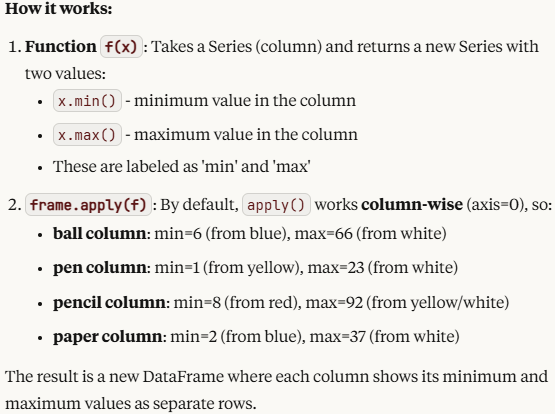

In [340]:
frame = pd.DataFrame(
    np.array([
        [11,22,33,44],
        [3,8,2,9],
        [1,2,3,4],
        [1,45,21,49]
    ]),
    index=['red','blue','yellow','white'],
    columns=['pen','pencil','paper','ball']
)
print(frame,"\n")

        pen  pencil  paper  ball
red      11      22     33    44
blue      3       8      2     9
yellow    1       2      3     4
white     1      45     21    49 



In [341]:
# Sort rows by index (default axis=0)
print("frame after frame.sort_index():, sorts index")
print(frame.sort_index(), "\n")
# Order: alphabetical → blue, red, white, yellow.

frame after frame.sort_index():, sorts index
        pen  pencil  paper  ball
blue      3       8      2     9
red      11      22     33    44
white     1      45     21    49
yellow    1       2      3     4 



In [342]:
# Sort columns by index
print("frame after frame.sort_index() with axis=1")
frame.sort_index(axis=1)
# Columns will be sorted alphabetically: ball, paper, pencil, pen.

frame after frame.sort_index() with axis=1


,ball,paper,pen,pencil
red,44,33,11,22
blue,9,2,3,8
yellow,4,3,1,2
white,49,21,1,45


In [343]:
frame = pd.DataFrame(
    np.array([
        [11, 22, 33, 44],
        [3, 8, 2, 9],
        [1, 2, 3, 4],
        [1, 45, 21, 49]
    ]),
    index=['red', 'blue', 'yellow', 'white'],
    columns=['pen', 'pencil', 'paper', 'ball']
)

print("Original DataFrame:\n", frame, "\n")

Original DataFrame:
         pen  pencil  paper  ball
red      11      22     33    44
blue      3       8      2     9
yellow    1       2      3     4
white     1      45     21    49 



Sort by values in a single column



In [344]:
# Sort rows based on values in the 'pen' column
sorted_by_pen = frame.sort_values(by='pen')
print("Sorted by 'pen':\n", sorted_by_pen, "\n")


Sorted by 'pen':
         pen  pencil  paper  ball
white     1      45     21    49
yellow    1       2      3     4
blue      3       8      2     9
red      11      22     33    44 



Sort by values in multiple columns


In [345]:
# Sort rows based on 'pen', then 'pencil'
sorted_multi = frame.sort_values(by=['pen', 'pencil'])
print("Sorted by 'pen' and then 'pencil':\n", sorted_multi, "\n")

# First sorts by pen.
# If there are ties, uses pencil column to break ties.

Sorted by 'pen' and then 'pencil':
         pen  pencil  paper  ball
yellow    1       2      3     4
white     1      45     21    49
blue      3       8      2     9
red      11      22     33    44 



 Sort in descending order

In [346]:
sorted_desc = frame.sort_values(by='pen', ascending=False)
print("Sorted by 'pen' (descending):\n", sorted_desc, "\n")

Sorted by 'pen' (descending):
         pen  pencil  paper  ball
red      11      22     33    44
blue      3       8      2     9
yellow    1       2      3     4
white     1      45     21    49 



Note:

If there is a tie and 'by' has only 1 column:

- Pandas keeps the original order of those tied rows.

- It does NOT sort them randomly.

- This behavior is called “stable sorting”.

In [347]:
# Eg:
df = pd.DataFrame({
    'A': [2, 1, 2, 1],
    'B': [5, 6, 7, 8]
}, index=['P','Q','R','S'])
print(df)
print('***********')
print(df.sort_values(by='A'))

   A  B
P  2  5
Q  1  6
R  2  7
S  1  8
***********
   A  B
Q  1  6
S  1  8
P  2  5
R  2  7


If by has 2 columns (numeric + string):

- Pandas sorts by the first column.

- If there’s a tie in the first column, it uses the second column.

- For strings, the order is alphabetical (lexicographical).

In [348]:
df = pd.DataFrame({
    'num': [2, 1, 2, 1],
    'name': ['bob', 'alice', 'adam', 'charlie']
})
print(df.sort_values(by=['num', 'name']))

# First sorted by num (1 before 2).
# For ties (same num), sorted alphabetically by name

   num     name
1    1    alice
3    1  charlie
2    2     adam
0    2      bob


pd.read_csv() is used to read a CSV (Comma-Separated Values) file directly into a pandas DataFrame.

pd.read_csv() always returns a DataFrame (not a Series), even if the CSV has only one column.

In [349]:
df = pd.read_csv("/content/drive/MyDrive/SampleData.csv")
df

,id,name,age,dept,salary
0,1,Alice,24,HR,40000
1,2,Bob,30,IT,55000
2,3,Charlie,28,Finance,48000
3,4,David,35,IT,62000
4,5,Eva,26,Marketing,45000


In [350]:
print(df.columns)

Index(['id', 'name ', 'age', 'dept', 'salary'], dtype='object')


If you want a Series directly (say of 'Name' column):

In [351]:
series = pd.read_csv("/content/drive/MyDrive/SampleData.csv")["name "]
series

,name
0,Alice
1,Bob
2,Charlie
3,David
4,Eva


In [352]:
ser = pd.Series([5,0,3,8,4], index=['red','blue','yellow','white','green'])
print(ser,"\n")

red       5
blue      0
yellow    3
white     8
green     4
dtype: int64 



In [353]:
print(ser.sort_values())

blue      0
yellow    3
green     4
red       5
white     8
dtype: int64


rank() in Pandas

Purpose: Assigns ranks to values in a Series or DataFrame.

Default behavior:

- Smallest value → rank 1

- Largest value → rank n

- method = 'average': If there are ties, assigns the average of their positions.

- ascending = True

In [354]:
print(ser.rank())

red       4.0
blue      1.0
yellow    2.0
white     5.0
green     3.0
dtype: float64


In [355]:
ser = pd.Series([7, 5, 5, 8])
print("Original Series:")
print(ser, "\n")

print("Default rank (method='average'):")
print(ser.rank())

# Step-by-step:
    # Sort values: [5, 5, 7, 8]
    # Positions: 5 (1st, 2nd), 7 (3rd), 8 (4th)
    # For the two 5's: average rank = (1 + 2) / 2 = 1.5

Original Series:
0    7
1    5
2    5
3    8
dtype: int64 

Default rank (method='average'):
0    3.0
1    1.5
2    1.5
3    4.0
dtype: float64


1. Covariance
What it tells?

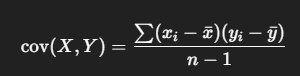

Covariance measures how two variables change together.

- If both go up together → positive covariance
- Measures how two variables vary together (but not the strength).
- One goes up while the other goes down → negative covariance

- Range:
  - No fixed range.
  - It can be any number (−∞ to +∞). That’s why it’s hard to interpret directly.


2. Correlation

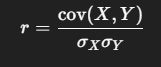

where,

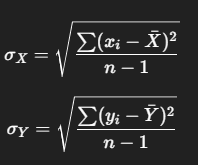

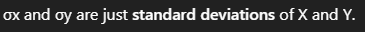

What it tells?

- Correlation is a scaled version of covariance.
- Measures the strength and direction of a linear relationship between two variables.
- It tells how strongly two variables are related, but in a standardized way.

- Range:
  - Always between -1 and +1.

  - +1 → Perfect positive relationship

  - -1 → Perfect negative relationship

  - 0 → No relationship

General structure of cov matrix:

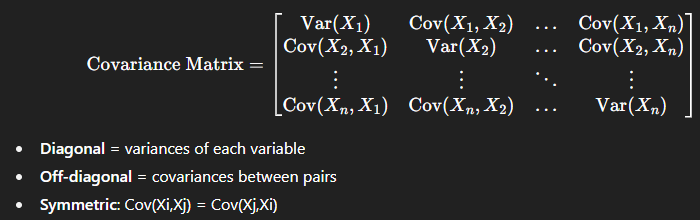

General structure of corr matrix:

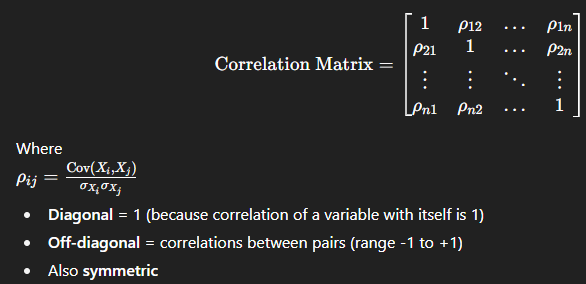

In [356]:
X = [1, 2, 3]
Y = [2, 4, 6]  # perfectly correlated with X (Y = 2 * X)

# Make a DataFrame
df = pd.DataFrame({'X': X, 'Y': Y})
print("Original Data:\n", df, "\n")

# Covariance matrix
print("Covariance matrix:\n", df.cov(), "\n")

# Correlation matrix
print("Correlation matrix:\n", df.corr(), "\n")

# Now change units of Y (multiply by 100)
df['Y_scaled'] = df['Y'] * 100
print("After scaling Y:\n", df, "\n")

print("Covariance matrix after scaling:\n", df[['X','Y_scaled']].cov(), "\n")
print("Correlation matrix after scaling:\n", df[['X','Y_scaled']].corr())


Original Data:
    X  Y
0  1  2
1  2  4
2  3  6 

Covariance matrix:
      X    Y
X  1.0  2.0
Y  2.0  4.0 

Correlation matrix:
      X    Y
X  1.0  1.0
Y  1.0  1.0 

After scaling Y:
    X  Y  Y_scaled
0  1  2       200
1  2  4       400
2  3  6       600 

Covariance matrix after scaling:
               X  Y_scaled
X           1.0     200.0
Y_scaled  200.0   40000.0 

Correlation matrix after scaling:
             X  Y_scaled
X         1.0       1.0
Y_scaled  1.0       1.0


In the above code sample:

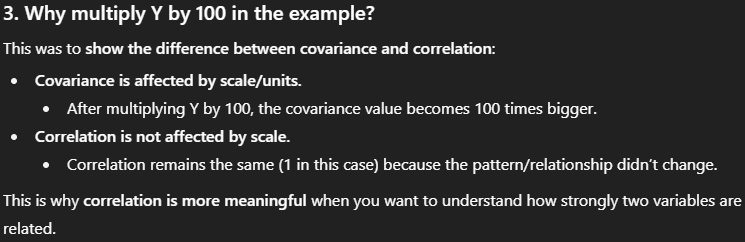

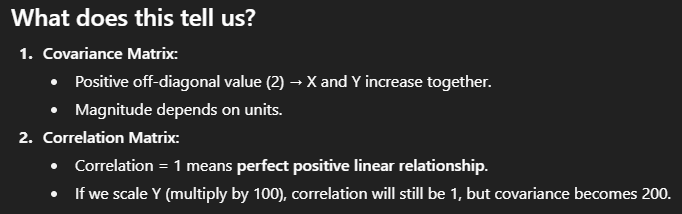

In [357]:
import pandas as pd

# Creating a 4×4 DataFrame with numeric data
frame2 = pd.DataFrame(
    [[1,4,3,6],
     [4,5,6,1],
     [3,3,1,5],
     [4,1,6,4]],
    index=['red','blue','yellow','white'],
    columns=['ball','pen','pencil','paper']
)

print(frame2)
print('************************************')

print(frame2.corr()) # Finds pairwise correlation between all numeric columns.
print('************************************')

frame2.cov() # Finds pairwise covariance between all numeric columns.

        ball  pen  pencil  paper
red        1    4       3      6
blue       4    5       6      1
yellow     3    3       1      5
white      4    1       6      4
************************************
            ball       pen    pencil     paper
ball    1.000000 -0.276026  0.577350 -0.763763
pen    -0.276026  1.000000 -0.079682 -0.361403
pencil  0.577350 -0.079682  1.000000 -0.692935
paper  -0.763763 -0.361403 -0.692935  1.000000
************************************


,ball,pen,pencil,paper
ball,2.000000,-0.666667,2.000000,-2.333333
pen,-0.666667,2.916667,-0.333333,-1.333333
pencil,2.000000,-0.333333,6.000000,-3.666667
paper,-2.333333,-1.333333,-3.666667,4.666667


Hierarchical Indexing (MultiIndex) in Pandas

1. What it is:
- Hierarchical indexing (MultiIndex) allows multiple levels of indexing for rows or columns.

- Useful for working with higher-dimensional data in a 2D table.

In [358]:
import pandas as pd
import random

data = [10, 15, 20, 25, 30, 35, 40, 45]

# MultiIndex (two levels)
colors = ['red','red','red','blue','blue','green','green','green']
directions = ['up','down','left','up','down','up','down','right']

# Create Series
mser = pd.Series(data, index=[colors, directions])
print("MultiIndex Series:\n", mser, "\n")

MultiIndex Series:
 red    up       10
       down     15
       left     20
blue   up       25
       down     30
green  up       35
       down     40
       right    45
dtype: int64 



In [359]:
# Access value at (red, up)
print("Value at (red, up):", mser['red', 'up'], "\n")

Value at (red, up): 10 



In [360]:
# All data for 'red'
print("All entries for 'red':\n", mser['red'])

All entries for 'red':
 up      10
down    15
left    20
dtype: int64


In [361]:
# All 'down' entries across all colors
print("All 'down' entries:\n", mser.loc[:, 'down'], "\n")
# OR
print("All 'down' entries:\n", mser[:, 'down'], "\n")
# The colon(:) ->means “select all colors” (red, blue, green).
# l = [1, 2, 3]
# print(l[:]) #o/p: [1, 2, 3] => print everything

All 'down' entries:
 red      15
blue     30
green    40
dtype: int64 

All 'down' entries:
 red      15
blue     30
green    40
dtype: int64 



In [362]:
# All 'down' entries across red and blue
print("All 'down' entries:\n", mser.loc[['red','blue'], 'down'], "\n")

All 'down' entries:
 red   down    15
blue  down    30
dtype: int64 



Index details:

In [363]:
print("mser.index:\n", mser.index)

mser.index:
 MultiIndex([(  'red',    'up'),
            (  'red',  'down'),
            (  'red',  'left'),
            ( 'blue',    'up'),
            ( 'blue',  'down'),
            ('green',    'up'),
            ('green',  'down'),
            ('green', 'right')],
           )


In [364]:
print("\nLevels in index:\n", mser.index.levels)
print("\nLevel 0:\n", mser.index.levels[0])
print("\nLevel 1:\n", mser.index.levels[1])
# Level 0 → colors (blue, green, red)
# Level 1 → directions (down, left, right, up)


Levels in index:
 [['blue', 'green', 'red'], ['down', 'left', 'right', 'up']]

Level 0:
 Index(['blue', 'green', 'red'], dtype='object')

Level 1:
 Index(['down', 'left', 'right', 'up'], dtype='object')


In [365]:
print(mser) # for further reference

red    up       10
       down     15
       left     20
blue   up       25
       down     30
green  up       35
       down     40
       right    45
dtype: int64


In [366]:
print(mser.index.codes)

# Explanation:
# The first array corresponds to Level 0:
# 2 means index 2 in ['blue','green','red'] → red (automatically sorted alphabetically)
# 0 means index 0 in ['blue','green','red'] → blue
# etc.

# The second array corresponds to Level 1: (automatically sorted alphabetically)
# 3 → 'up'
# 0 → 'down'
# 1 → 'left'
# 2 → 'right'

# So (2,3) = (red, up)

[[2, 2, 2, 0, 0, 1, 1, 1], [3, 0, 1, 3, 0, 3, 0, 2]]


In [367]:
mser.index.get_level_values(0)
# This gets all values of level 0 (outer):

Index(['red', 'red', 'red', 'blue', 'blue', 'green', 'green', 'green'], dtype='object')

In [368]:
mser.index.get_level_values(1)
# This gets all values of level 1

Index(['up', 'down', 'left', 'up', 'down', 'up', 'down', 'right'], dtype='object')

DataFrame lookup:

In [369]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah'],
    'Age': [25, 30, 22, 35, 28, 40, 23, 31],
    'Score': [88.5, 92.0, 79.0, 85.5, 90.0, 76.0, 89.5, 84.0],
    'Passed': [True, True, False, True, True, False, True, True]
}

df = pd.DataFrame(data)
print(df)

      Name  Age  Score  Passed
0    Alice   25   88.5    True
1      Bob   30   92.0    True
2  Charlie   22   79.0   False
3    David   35   85.5    True
4      Eva   28   90.0    True
5    Frank   40   76.0   False
6    Grace   23   89.5    True
7   Hannah   31   84.0    True


In [370]:
df.head() # Print 1st 5 records

,Name,Age,Score,Passed
0,Alice,25,88.5,True
1,Bob,30,92.0,True
2,Charlie,22,79.0,False
3,David,35,85.5,True
4,Eva,28,90.0,True


In [371]:
df.tail() # Print last 5 records

,Name,Age,Score,Passed
3,David,35,85.5,True
4,Eva,28,90.0,True
5,Frank,40,76.0,False
6,Grace,23,89.5,True
7,Hannah,31,84.0,True


In [372]:
df.head(2) # Print 1st 2 records

,Name,Age,Score,Passed
0,Alice,25,88.5,True
1,Bob,30,92.0,True


In [373]:
df.tail(2) # Print last 2 records

,Name,Age,Score,Passed
6,Grace,23,89.5,True
7,Hannah,31,84.0,True


In [374]:
df.sample(2) # Print random 2 records

,Name,Age,Score,Passed
0,Alice,25,88.5,True
4,Eva,28,90.0,True


In [375]:
# Get rows where Name is "Eva"
# df[df['Name'] == 'Eva']
# OR
df.loc[df['Name'] == 'Eva']

,Name,Age,Score,Passed
4,Eva,28,90.0,True


In [376]:
# Just 'Name' and 'Score' of 1st 3 records
df[["Name", "Score"]].head(3)

,Name,Score
0,Alice,88.5
1,Bob,92.0
2,Charlie,79.0


.map():

Works on one column only.

In [377]:
def grade_category(score):
    if score >= 90:
        return "Excellent"
    elif score >= 75:
        return "Good"
    else:
        return "Average"

df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'],
                   'Score': [92, 76, 68]})
print(df)
print('*********************')

# Apply the function to a column
df['Grade'] = df['Score'].map(grade_category)
print(df)


      Name  Score
0    Alice     92
1      Bob     76
2  Charlie     68
*********************
      Name  Score      Grade
0    Alice     92  Excellent
1      Bob     76       Good
2  Charlie     68    Average


.apply()

In [379]:
def add_bonus(salary):
    return salary + 5000

df = pd.DataFrame({'Employee': ['A', 'B', 'C'],
                   'Salary': [40000, 50000, 60000]})

df['Updated_Salary'] = df['Salary'].apply(add_bonus)

print(df)


  Employee  Salary  Updated_Salary
0        A   40000           45000
1        B   50000           55000
2        C   60000           65000


.apply_map():

Works element-wise on every value in a DataFrame.

In [381]:
def to_upper(val):
    if isinstance(val, str): # isinstance(val, str) checks if 'val' is a string
        return val.upper()
    return val

df = pd.DataFrame({
    'Name': ['alice', 'bob'],
    'City': ['delhi', 'mumbai']
})

print(df)
print('*******************')

df = df.applymap(to_upper)

print(df)


    Name    City
0  alice   delhi
1    bob  mumbai
*******************
    Name    City
0  ALICE   DELHI
1    BOB  MUMBAI


/tmp/ipython-input-1356257588.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(to_upper)


.groupby():

In [387]:
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'city': ['NY', 'LA', 'NY', 'LA'],
    'salary': [70000, 80000, 60000, 75000]
})
print(df)
print('************************')
# Group by city and calculate mean salary
df.groupby('city')['salary'].mean()

      name city  salary
0    Alice   NY   70000
1      Bob   LA   80000
2  Charlie   NY   60000
3    David   LA   75000
************************


,salary
city,
LA,77500.0
NY,65000.0


.agg():

In [388]:
df.groupby('city')['salary'].agg(['sum', 'mean', 'count'])

,sum,mean,count
city,,,
LA,155000,77500.0,2
NY,130000,65000.0,2


In [384]:
# Another eg: (groupby)
data = {
    'department': ['HR', 'IT', 'IT', 'HR', 'Sales', 'Sales', 'HR'],
    'employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'salary': [50000, 60000, 65000, 52000, 45000, 47000, 53000],
    'bonus': [5000, 7000, 6000, 5200, 3000, 3200, 5400]
}

df = pd.DataFrame(data)
print(df)


  department employee  salary  bonus
0         HR    Alice   50000   5000
1         IT      Bob   60000   7000
2         IT  Charlie   65000   6000
3         HR    David   52000   5200
4      Sales      Eve   45000   3000
5      Sales    Frank   47000   3200
6         HR    Grace   53000   5400


In [385]:
df.groupby('department')['salary'].mean()
# Groups the rows based on the department
# Calculates average salary for each group


,salary
department,
HR,51666.666667
IT,62500.000000
Sales,46000.000000


Aggregate functions:aggregate multiple columns/functions

In [386]:
df.groupby('department').agg({
    'salary': 'mean',
    'bonus': 'sum'
})

,salary,bonus
department,,
HR,51666.666667,15600
IT,62500.000000,13000
Sales,46000.000000,6200


.merge():

In [392]:
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
})
print(df1)
print('********************')

df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'score': [85, 90, 75]
})
print(df2)
print('********************')

# Merge on 'id' column
merged_df = pd.merge(df1, df2, on='id')
merged_df

   id     name
0   1    Alice
1   2      Bob
2   3  Charlie
********************
   id  score
0   1     85
1   2     90
2   4     75
********************


,id,name,score
0,1,Alice,85
1,2,Bob,90


In [395]:
# Vertical concat (add rows)
pd.concat([df1, df1], axis=0)

,id,name
0,1,Alice
1,2,Bob
2,3,Charlie
0,1,Alice
1,2,Bob
2,3,Charlie


In [396]:
# Horizontal concat (add columns)
pd.concat([df1, df2], axis=1)

,id,name,id,score
0,1,Alice,1,85
1,2,Bob,2,90
2,3,Charlie,4,75


Working with dates:

In [402]:
data = {'name': ['Alice', 'Bob', 'Charlie'],
        'join_date': ['2023-01-15', '2022-03-10', '2024-07-05']}
df = pd.DataFrame(data)
print(df)

      name   join_date
0    Alice  2023-01-15
1      Bob  2022-03-10
2  Charlie  2024-07-05


In [404]:
# convert to datetime
df['join_date'] = pd.to_datetime(df['join_date'])
# Now pandas understands that join_date is a proper datetime column. You can now extract day, month, year, etc.
df

,name,join_date
0,Alice,2023-01-15
1,Bob,2022-03-10
2,Charlie,2024-07-05


In [406]:
# Extract year, month, day:
df['year'] = df['join_date'].dt.year
df['month'] = df['join_date'].dt.month
df['day'] = df['join_date'].dt.day

print(df)

      name  join_date  year  month  day
0    Alice 2023-01-15  2023      1   15
1      Bob 2022-03-10  2022      3   10
2  Charlie 2024-07-05  2024      7    5


In [409]:
df['weekday'] = df['join_date'].dt.day_name() # Returns the name of the day (e.g., 'Monday', 'Friday').
df['is_month_end'] = df['join_date'].dt.is_month_end # Checks if the date is the last day of its month.
df

,name,join_date,year,month,day,weekday,is_month_end
0,Alice,2023-01-15,2023,1,15,Sunday,False
1,Bob,2022-03-10,2022,3,10,Thursday,False
2,Charlie,2024-07-05,2024,7,5,Friday,False
